In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

In [3]:
placements = pd.read_csv("placements.csv", index_col = "sl_no")

In [4]:
placements.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


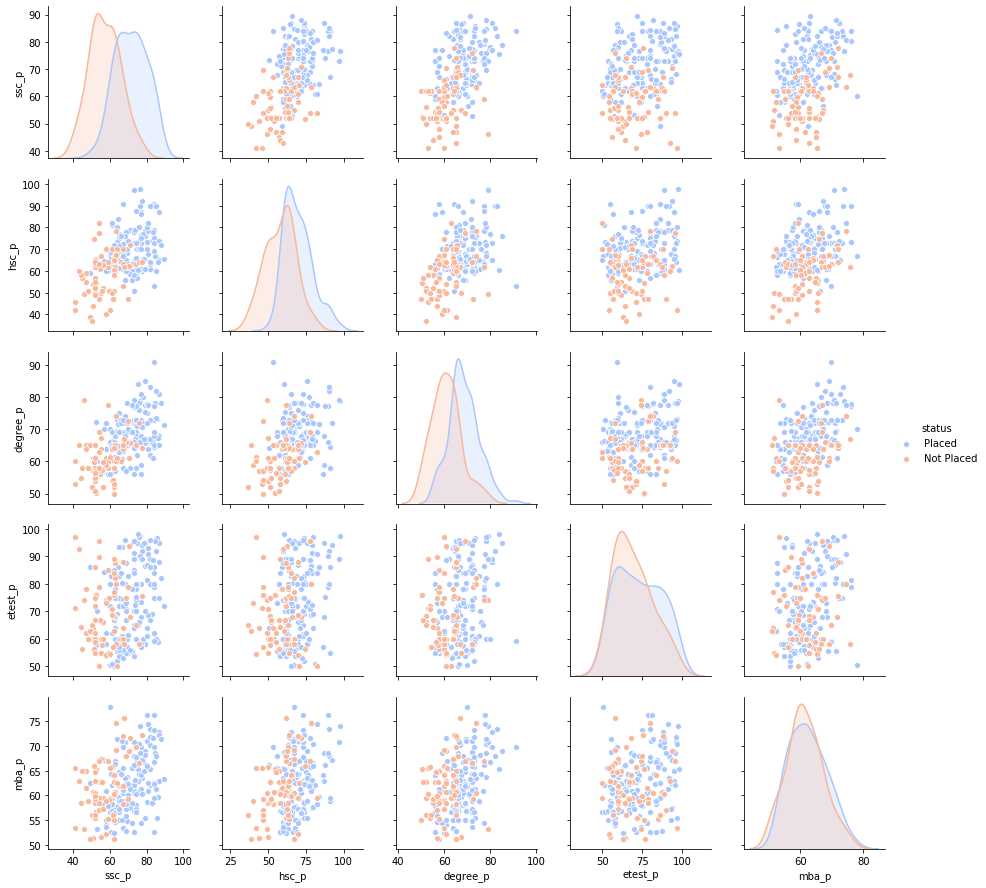

In [5]:
sns.pairplot(placements.drop("salary", axis = 1), hue = "status", palette = "coolwarm")

In [6]:
placements_dum_drop = pd.get_dummies(data = placements, drop_first = True)

In [7]:
placements_dum_drop.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0,1
3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
4,56.00,52.00,52.00,66.0,59.43,NaN,1,0,0,0,1,0,1,0,1,0
5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0,1


Predicting whether a student will be placed

In [8]:
placements_dum_drop["status_Placed"].value_counts()

1    148
0     67
Name: status_Placed, dtype: int64

In [9]:
placements_logit = pd.get_dummies(data = placements.drop(labels = ['ssc_b', 'hsc_b', 'degree_t', 'mba_p', 'salary'], axis = 1), drop_first = True)

In [10]:
placements_logit.head()

,ssc_p,hsc_p,degree_p,etest_p,gender_M,hsc_s_Commerce,hsc_s_Science,workex_Yes,specialisation_Mkt&HR,status_Placed
sl_no,,,,,,,,,,
1,67.00,91.00,58.00,55.0,1,1,0,0,1,1
2,79.33,78.33,77.48,86.5,1,0,1,1,0,1
3,65.00,68.00,64.00,75.0,1,0,0,0,0,1
4,56.00,52.00,52.00,66.0,1,0,1,0,1,0
5,85.80,73.60,73.30,96.8,1,1,0,0,0,1


In [11]:
placements_logit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 10 columns):
ssc_p                    215 non-null float64
hsc_p                    215 non-null float64
degree_p                 215 non-null float64
etest_p                  215 non-null float64
gender_M                 215 non-null uint8
hsc_s_Commerce           215 non-null uint8
hsc_s_Science            215 non-null uint8
workex_Yes               215 non-null uint8
specialisation_Mkt&HR    215 non-null uint8
status_Placed            215 non-null uint8
dtypes: float64(4), uint8(6)
memory usage: 19.7 KB


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(placements_logit.drop('status_Placed',axis=1), 
                                                    placements_logit['status_Placed'], test_size=0.3, 
                                                    random_state=69)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
pred = logmodel.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
confusion_matrix(y_test, pred)

array([[12,  5],
       [ 5, 43]], dtype=int64)

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.90      0.90      0.90        48

   micro avg       0.85      0.85      0.85        65
   macro avg       0.80      0.80      0.80        65
weighted avg       0.85      0.85      0.85        65



In [20]:
#Upsample zeroes
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis = 1)
trues = X[X["status_Placed"] == 1]
falses = X[X["status_Placed"] == 0]
false_upsampled = resample(falses,replace = True, n_samples = len(trues),random_state=420)
upsampled = pd.concat([trues,false_upsampled])
y_train = upsampled["status_Placed"]
X_train = upsampled.drop("status_Placed",axis=1)

In [21]:
logmodel_upsampled = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)

In [22]:
confusion_matrix(y_test, upsampled_pred)

array([[16,  1],
       [13, 35]], dtype=int64)

In [23]:
print(classification_report(y_test,upsampled_pred))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70        17
           1       0.97      0.73      0.83        48

   micro avg       0.78      0.78      0.78        65
   macro avg       0.76      0.84      0.76        65
weighted avg       0.86      0.78      0.80        65



In [24]:
#Reset training and testing data
X_train, X_test, y_train, y_test = train_test_split(placements_logit.drop('status_Placed',axis=1), 
                                                    placements_logit['status_Placed'], test_size=0.3, 
                                                    random_state=69)

In [25]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[15  2]
 [11 37]]
              precision    recall  f1-score   support

           0       0.58      0.88      0.70        17
           1       0.95      0.77      0.85        48

   micro avg       0.80      0.80      0.80        65
   macro avg       0.76      0.83      0.77        65
weighted avg       0.85      0.80      0.81        65



In [26]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[16  1]
 [ 5 43]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.98      0.90      0.93        48

   micro avg       0.91      0.91      0.91        65
   macro avg       0.87      0.92      0.89        65
weighted avg       0.92      0.91      0.91        65



In [27]:
#Support vector machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[ 0 17]
 [ 0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.74      1.00      0.85        48

   micro avg       0.74      0.74      0.74        65
   macro avg       0.37      0.50      0.42        65
weighted avg       0.55      0.74      0.63        65



C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#svm hyperparameter tuning
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.66, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.673469387755102, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.66, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.673469387755102, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[C

C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.0001, kernel=rbf, score=0.66, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.673469387755102, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............. C=1, gamma=1, kernel=rbf, score=0.66, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.673469387755102, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ........... C=1, gamma=0.1, kernel=rbf, score=0.66, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ..................................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
C:\Users\Mick4\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [29]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[11  6]
 [ 6 42]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.88      0.88      0.88        48

   micro avg       0.82      0.82      0.82        65
   macro avg       0.76      0.76      0.76        65
weighted avg       0.82      0.82      0.82        65



In [30]:
#XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)

C:\Users\Mick4\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [31]:
#XGBoost predictions
preds = bst.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])
print(confusion_matrix(y_test,best_preds))
print(classification_report(y_test,best_preds))

[[15  2]
 [ 9 39]]
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        17
           1       0.95      0.81      0.88        48

   micro avg       0.83      0.83      0.83        65
   macro avg       0.79      0.85      0.80        65
weighted avg       0.87      0.83      0.84        65



From this it is clear that the random forest classifier has the strongest predictive power. However, we have not done hyperparameter tuning for the XGBoost model yet. 

Part 2: Generating a regression model that predicts salaries, given that the students were placed.

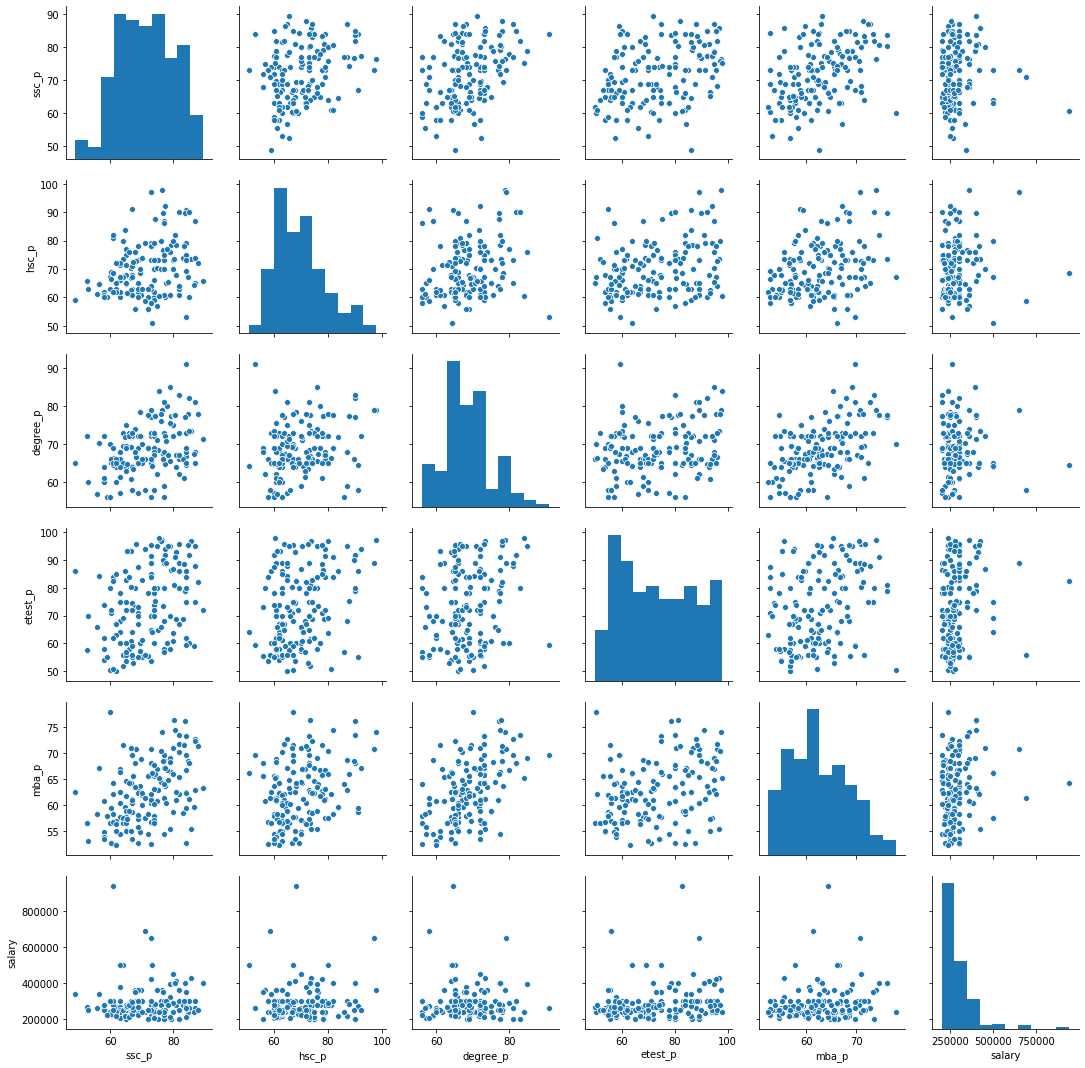

In [32]:
sns.pairplot(data = placements.dropna().drop("status", axis = 1))

In [33]:
salaries = pd.get_dummies(data = placements.dropna().drop("status", axis = 1), drop_first = True)

In [34]:
salaries.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1
2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0
3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0
5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0
8,82.00,64.00,66.00,67.0,62.14,252000.0,1,0,0,0,1,0,1,1,0


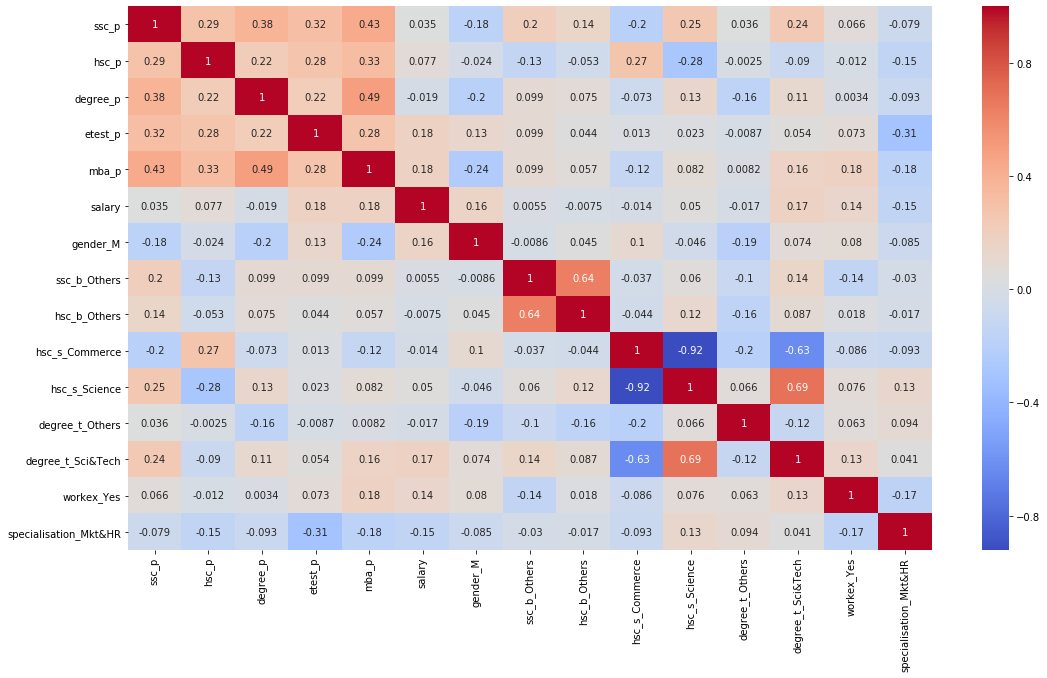

In [35]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(salaries.corr(),cmap='coolwarm',annot=True, ax = ax)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(salaries.drop("salary", axis = 1), 
                                                    salaries['salary'], 
                                                    test_size=0.3, 
                                                    random_state = 69)
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
print(lin.intercept_)
coeff_df = pd.DataFrame(lin.coef_,salaries.drop("salary", axis = 1).columns,columns=['Coefficient'])
coeff_df

362452.68478149327


,Coefficient
ssc_p,-251.668548
hsc_p,-554.869304
degree_p,-4632.139232
etest_p,-10.214708
mba_p,3415.650195
gender_M,36149.637351
ssc_b_Others,9147.361037
hsc_b_Others,-36441.294459
hsc_s_Commerce,89899.650466
hsc_s_Science,79403.098257


MAE: 72324.47580902527
MSE: 10257911511.236382
RMSE: 101281.34828899338


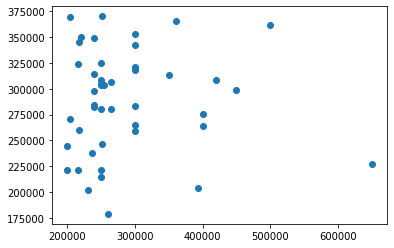

In [38]:
predictions = lin.predict(X_test)
plt.scatter(y_test,predictions)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [39]:
salaries_lin = salaries.drop(["degree_p","ssc_b_Others", "hsc_b_Others"], axis = 1)

183696.10926241448
MAE: 61903.55662528389
MSE: 7725186434.017356
RMSE: 87893.0397359049


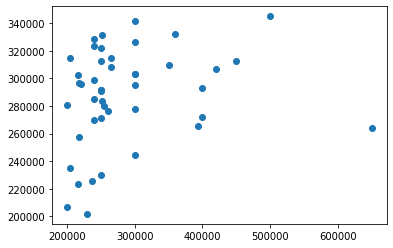

In [40]:
X_train, X_test, y_train, y_test = train_test_split(salaries_lin.drop("salary", axis = 1), 
                                                    salaries_lin['salary'], 
                                                    test_size=0.3, 
                                                    random_state = 69)
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)
print(lin.intercept_)
coeff_df = pd.DataFrame(lin.coef_,salaries_lin.drop("salary", axis = 1).columns,columns=['Coefficient'])
coeff_df
predictions = lin.predict(X_test)
plt.scatter(y_test,predictions)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Part 3: Determine whether test scores are relevant

In [41]:
placements.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [45]:
ssc_placed = placements[placements["status"] == "Placed"]["ssc_p"]
ssc_not_placed = placements[placements["status"] == "Not Placed"]["ssc_p"]

In [51]:
sp.var(ssc_placed)

75.44574914170933

In [52]:
sp.var(ssc_not_placed)

69.41167182000449

In [48]:
sp.stats.ttest_ind(ssc_placed, ssc_not_placed, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=11.333161914426633, pvalue=3.2462519065276938e-21)

In [57]:
sp.stats.ks_2samp(ssc_placed, ssc_not_placed)

Ks_2sampResult(statistic=0.6032674465510286, pvalue=1.3528596948590965e-15)

In [59]:
hsc_placed = placements[placements["status"] == "Placed"]["hsc_p"]
hsc_not_placed = placements[placements["status"] == "Not Placed"]["hsc_p"]
print(sp.stats.ttest_ind(hsc_placed, hsc_not_placed, axis=0, equal_var=False, nan_policy='propagate'))
print(sp.stats.ks_2samp(ssc_placed, ssc_not_placed))

Ttest_indResult(statistic=8.043664447396637, pvalue=6.777404050505178e-13)
Ks_2sampResult(statistic=0.6032674465510286, pvalue=1.3528596948590965e-15)


In [60]:
degree_placed = placements[placements["status"] == "Placed"]["degree_p"]
degree_not_placed = placements[placements["status"] == "Not Placed"]["degree_p"]
print(sp.stats.ttest_ind(degree_placed, degree_not_placed, axis=0, equal_var=False, nan_policy='propagate'))
print(sp.stats.ks_2samp(degree_placed, degree_not_placed))

Ttest_indResult(statistic=8.054153474152734, pvalue=4.4075682102481147e-13)
Ks_2sampResult(statistic=0.5204719645018152, pvalue=1.0220353079543306e-11)


In [61]:
etest_placed = placements[placements["status"] == "Placed"]["etest_p"]
etest_not_placed = placements[placements["status"] == "Not Placed"]["etest_p"]
print(sp.stats.ttest_ind(etest_placed, etest_not_placed, axis=0, equal_var=False, nan_policy='propagate'))
print(sp.stats.ks_2samp(etest_placed, etest_not_placed))

Ttest_indResult(statistic=1.9801117719649113, pvalue=0.049578588665969994)
Ks_2sampResult(statistic=0.18434852763210974, pvalue=0.07663606200132085)


In [62]:
mba_placed = placements[placements["status"] == "Placed"]["mba_p"]
mba_not_placed = placements[placements["status"] == "Not Placed"]["mba_p"]
print(sp.stats.ttest_ind(mba_placed, mba_not_placed, axis=0, equal_var=False, nan_policy='propagate'))
print(sp.stats.ks_2samp(mba_placed, mba_not_placed))

Ttest_indResult(statistic=1.1392009709795472, pvalue=0.2566949127537054)
Ks_2sampResult(statistic=0.10881403791851557, pvalue=0.6207695278454166)
